# Lab 2 Control theory, B03-04


#**Important information**
> **LABS** \
**Tasks for lab assignment 2:** [Lab 2](https://github.com/SergeiSa/Control-Theory-Slides-Spring-2021/blob/main/ColabNotebooks/Lab2_Control2021.ipynb)\
**Deadline for lab assignment 2:** 17th of March 11:59PM\
**File name for assignment submission:** `yourname_group.ipynb` (example: `IvanovIvan_B03.ipynb`) 

>**FEEDBACK** \
Feedback form is available by the [link](https://docs.google.com/forms/d/1Q8dyBbCRiY-oy9jY2ujxd2y8EBxlULzXsXOVghTeHiQ/edit).
You are welcome to ask a questions about the practice sessions here.

# 1. State Feedback controler

## Linear feedback

Full-state Feedback Control

1.  How do we change the poles of the state-space system?
2.  Or, even if we can change the pole locations.
3.  Where do we change the pole locations to?


Assume that the single-input system dynamics are given by
$$\begin{align} 
  \dot{x}(t) &= A x(t) + Bu(t) \\
  y(t)  &= C x(t) 
\end{align}$$
so that $D = 0$

Recall that the system poles are given by the eigenvalues of A.
We ant to use the input u(t) to modify the eigenvalues of A to
change the system dynamics.


<p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=134MJfHRJEBMLVe4pWDmCp8qmYhkXb7eD" align="center" hspace="350px" vspace="0px"></p>

Assume a full-state feedback of the form:
$$ u = -Kx(t)$$

We can write the new closed-loop dynamics:
\begin{equation}
    \dot{x} = A {x} - {B}{K}{x}
\end{equation}

\begin{equation}
    \dot{{x}} = ({A} - {B}{K}){x}
\end{equation}

**Objective**: Pick $K$ so that $ A - BK$ has the desired properties, e.g
*   $A$ unstable, we want $A-BK$ to be  stable
*   Put 2 poles at $−2 ± 2i$




### Example 1:  Linear system with one control input


Consider the following system:
$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
$$
The eigenvalues are $\lambda_1 = -10$ and $\lambda_1 = 1$, so unstable. 

Now let's consider the same system, but with control input:

$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
+
\begin{pmatrix} 
1 \\ 0
\end{pmatrix}
u
$$

Let us chose that $u = -2x_1$, in other words:

$$
u = 
\begin{pmatrix} 
-2 & 0
\end{pmatrix}
x
$$

Then we can rewrite this as:

$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
+
\begin{pmatrix} 
1 \\ 0
\end{pmatrix}
\begin{pmatrix} 
-2 & 0
\end{pmatrix}
x
$$

$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
+
\begin{pmatrix} 
-2 & 0 \\ 0 & 0
\end{pmatrix}
x
$$


$$
\dot x = 
\begin{pmatrix} 
-1 & 0 \\ -5 & -10
\end{pmatrix}
x
$$

Now the eigenvalues are $\lambda_1 = -10$ and $\lambda_1 = -1$, so stable. 

In [ ]:

import numpy as np
from numpy.linalg import eig

A = np.array([[1, 0], [-5, -10]]) # state matrix
e, v = eig(A)
print("eigenvalues of A:", e)

A = np.array([[-1, 0], [-5, -10]]) # state matrix
e, v = eig(A)
print("eigenvalues of A:", e)

eigenvalues of A: [-10.   1.]
eigenvalues of A: [-10.  -1.]


### Example 2: Consider the system :


\begin{align}
    \dot{x}(t) = \begin{bmatrix}
        1 & 1  \\
        1 & 2  
    \end{bmatrix} x(t) + 
    \begin{bmatrix}
        1 \\
        0   
    \end{bmatrix} u
\end{align}

Then $$det(sI − A) = (s − 1)(s − 2) − 1 = s^2 − 3s + 1 = 0 $$ so the
system is unstable

Define $k =  [k_1 \quad k_2] \qquad u(t) = −Kx(t)$, then


\begin{align}
    A_{cl} = A  - BK = \begin{bmatrix}
        1 & 1  \\
        1 & 2  
    \end{bmatrix} -  
    \begin{bmatrix}
        1 \\
        0   
    \end{bmatrix} 
    \begin{bmatrix}
        k_1  & k_2
    \end{bmatrix} =
    \begin{bmatrix}
        1 -k_1 & 1 - k_2\\
        1  & 2 
    \end{bmatrix}  
\end{align}

which gives
$$det(sI − A_{cl} ) = s^2 + (k 1 − 3)s + (1 − 2k 1 + k 2 ) = 0$$
Thus, by choosing $k_1$ and $k_2$ , we can put $λ_i(A_{cl} )$  anywhere in the
complex plane

To put the poles at $s = −5, − 6$, we compare the desired characteristic equation
$$(s + 5)(s + 6) = s 2 + 11s + 30 = 0$$
with the closed-loop one
$$s 2 + (k_1 − 3)s + (1 − 2k_1 + k_2 ) = 0$$
to conclude that
\begin{align}
  &k_1 − 3 = 11 \\
  &1 − 2k_1 + k_2 = 30
\end{align} 


 \begin{align}
 \implies & k_1= 14 \\
  & k_2 = 57
\end{align} 
so that $K = [14 \quad 57]$ , which is called **Pole Placement**.

## Pole placement

It is a technique for finding suitable $K$ matrix that would produced desired eigenvalues of the $A - BK$ system. It is called pole placement.

Watch the intoduction to pole placement for self-study: [link](https://www.youtube.com/watch?v=FXSpHy8LvmY&ab_channel=MATLAB). Notice the difference between the approach to "steady state" control design show there, and in the lecture.

In [ ]:
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
from scipy.signal import place_poles


n = 2
A = np.array([[1, 0], [-5, -10]])
B = np.array([[1], [0]])

# x_dot from state space
def StateSpace(x, t):
    return A.dot(x)# + B*np.sin(t)

time = np.linspace(0, 1, 1000)   
x0 = np.random.rand(n)  # initial state

solution = {"SS": odeint(StateSpace, x0, time)}

#desired eigenvalues
poles = np.array([-1, -2])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix;
print("K:", K)

#test that eigenvalues of the closed loop system are what they are supposed to be 
e, v = eig((A - B.dot(K)))
print("eigenvalues of A - B*K:", e)

K: [[ -6.  -14.4]]
eigenvalues of A - B*K: [-1. -2.]


In [ ]:
#desired eigenvalues
poles = np.array([-100, -200])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix;
print("K:", K)

#test that eigenvalues of the closed loop system are what they are supposed to be 
e, v = eig((A - B.dot(K)))
print("eigenvalues of A - B*K:", e)

#notice how different the gain matrix is!

K: [[  291. -3420.]]
eigenvalues of A - B*K: [-200. -100.]


### Example:

**Exmaple 1.1 Make the following systems stable, proposing appropriate control**


$$\dot x = 
\begin{pmatrix} 20 & 50 \\ -1 & 3
\end{pmatrix}
x
+
\begin{pmatrix} 
-2 \\ 0
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 0 & -5 \\ 1 & 20
\end{pmatrix}
x
+
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 1 & 3 \\ -6 & 30
\end{pmatrix}
x
+
\begin{pmatrix} 
10 \\ 5
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} -5 & 5 \\ 16 & 5
\end{pmatrix}
x
+
\begin{pmatrix} 
-10 \\ 10
\end{pmatrix}
u
$$

**Example 1.2 Make the following systems stables, proposing appropriate control**

$$\dot x = 
\begin{pmatrix} 10 & 30 \\ -2 & 10
\end{pmatrix}
x
+
\begin{pmatrix} 
1 & 2 \\ 10 & -4
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 1 & -8 \\ 5 & 20
\end{pmatrix}
x
+
\begin{pmatrix} 
-3 & 1 \\ 1 & 0
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} -2 & 4 \\ -6 & 15
\end{pmatrix}
x
+
\begin{pmatrix} 
0 & -3 \\ 4 & -2
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 4 & -5 \\ -5 & 15
\end{pmatrix}
x
+
\begin{pmatrix} 
-5 & 2 \\ 11 & 2
\end{pmatrix}
u
$$

## Root locus

We will now look at the root locus in general and look in more detail at some
of the observations we made from our example.

<p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1G9SZexu9JBkO0oX16sMM2SDCSKvdLlYK" align="center" hspace="350px" vspace="0px"></p>

Consider a closed loop system above with unity feedback that uses simple
proportional controller. It has a transfer function

$$H(s) = \frac{K G(s)}{1 + KG(s)} = \frac{n(s)}{d(s)}$$
The poles occur at the roots of $d(s)$. For system transfer function above these roots occur where
$$ 1 + K G(s) = 0$$

This is referred to as the characteristic equation of the system.
\begin{align*}
    |KG(s)| &= 1 \\
    ∠G(s) &= 180◦ ± k360◦ \quad for k ∈ Z.
\end{align*}
These two equations are referred to as the Magnitude and Angle criteria
respectively.

Therefore, the root locus is the path of the roots of the characteristic equation due to $K$ as $K$ is traced out to infinity.

### Example:



Consider the following question: given system $\dot x = Ax+Bu$ and control $u = 
-Kx$, how does the change in $K$ changes the eigenvalues of the resulting matrix $(A - BK)$?

Root locus method is drawing the graph of eigenvalues of the matrix $(A - BK)$ for a given change of matrix $K$. We only vary a single component of $K$, so the result is a line.

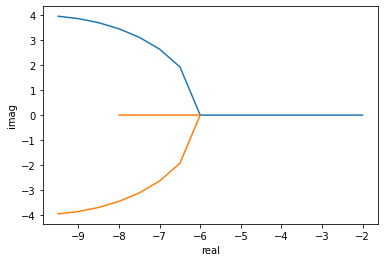

In [ ]:
import matplotlib.pyplot as plt

A = np.array([[1, -7], [2, -10]])
B = np.array([[1], [0]])
K0 = np.array([[1, 1]]);

k_min = 1;
k_max = 10;
k_step = 0.1;

Count = np.floor((k_max-k_min)/k_step)
Count = Count.astype(int)

k_range = np.linspace(k_min, k_max, Count)

E = np.zeros((Count, 4))

for i in range(Count):
    K0[0, 0] = k_range[i]

    ei, v = eig((A - B.dot(K0)))

    E[i, 0] = np.real(ei[0])
    E[i, 1] = np.imag(ei[0])
    E[i, 2] = np.real(ei[1])
    E[i, 3] = np.imag(ei[1])

    #print("eigenvalues of A - B*K:", ei)


plt.plot(E[:, 0], E[:, 1])
plt.plot(E[:, 2], E[:, 3])
plt.xlabel('real')
plt.ylabel('imag')
plt.show()


# 2. Optimization Based Control


**Affine control**

We don't have to limit ourselves to just this $$\dot{{x}} = {A}{x} + {B}{u}$$ and ${u} = -{K}{x}$ pair. 

In fact, this pair mostly works for the simple case when the solution we want to stabilize is trivial ${x}^*(t) = 0$.
Let us consider a slightly more complicated system:

\begin{equation}
    \dot{{x}} = {A}{x} + {B}{u} + {c}
\end{equation}

This is called **affine system**, because of the constant term ${c}$. What is the control that stabilizes this system? Let us propose an affine control law:
\begin{equation}
    {u} = -{K}{x} + {u}^*
\end{equation}
where ${u}^*$ is a constant term.

Thus, from $\dot{{x}} = {A}{x} + {B}{u} + {c}$ and ${u} = -{K}{x} + {u}^*$ we get the following closed-loop system:
\begin{equation}
    \dot{{x}} = {A}{x} - {B}{K}{x} + {B}{u}^* + {c}
\end{equation}

And as long as we can choose such ${u}^*$ that ${B}{u}^* = -{c}$, we will get back to the previously seen form $\dot{{x}} = ({A} - {B}{K}){x}$.

Notice that same as it is possible that there exists no such ${K}$ that $\dot{{x}} = ({A} - {B}{K}){x}$ is stable, same there might exist no such ${u}^*$ that ${B}{u}^* = -{c}$

**Error dynamics**

Let us now consider an arbitrary solution ${x}^* = {x}^*(t)$ for the linear system

\begin{equation}
    \dot{{x}} = {A}{x} + {B}{u}
\end{equation}
and try to find a stabilizing control for it.

Our first step is to notice that, if ${x}^* = {x}^*(t)$ is a solution, that means that it satisfies the ODE :

\begin{equation}
    \dot{{x}}^* = {A}{x}^* + {B}{u}^*
\end{equation}

where ${u}^* = {u}^*(t)$ is some control law, for which the solution ${x}^* = {x}^*(t)$ is obtained. 

 If we are not given ${u}^* = {u}^*(t)$, we can compute it as:
\begin{equation}
    {u}^* = {B}^+(\dot{{x}}^* - {A}{x}^*)
\end{equation}
where ${B}^+$ is a pseudo-inverse, and the solution to this least-squared problem will have to have no residual (since ${x}^* = {x}^*(t)$ is a solution).

\begin{equation}
   || \dot{{x}}^* - {A}{x}^* - {B}{B}^+(\dot{{x}}^* - {A}{x}^*) || = 0
\end{equation}

Now, let us introduce the concept of **control error** ${e}$:

\begin{equation}
    {e} = {x} - {x}^*
\end{equation}
If control error goes to zero asymptotically, every solution goes to ${x}^*$.

Remember that we have two simultaneous equations: $\dot{{x}} = {A}{x} + {B}{u}$ and $\dot{{x}}^* = {A}{x}^* + {B}{u}^*$. We can now subtract one from the other to get:
\begin{equation}
    \dot{{x}} - \dot{{x}}^* = {A}{x} - {A}{x}^* + {B}{u} - {B}{u}^*
\end{equation}
in other words:
\begin{equation}
    \dot{{e}} = {A}{e} + {B}{v}
\end{equation}

where ${v} = {u} - {u}^*$

We arrived at a new dynamical system $\dot{{e}} = {A}{e} + {B}{v}$, which is an LTI, and we are interested in stabilizing the solution ${e}^* = 0$. We know how to do it with a linear control law:
\begin{equation}
    {v} = -{K}{e}
\end{equation}
Now remember that ${v} = {u} - {u}^*$ and ${e} = {x} - {x}^*$, this will become:
\begin{equation}
    {u} = -{K}({x} - {x}^*) + {u}^*
\end{equation}

This control law ${u} = -{K}({x} - {x}^*) + {u}^*$ can be thought of as consisting of two parts:

* Feedback control ${u}_{FB} = -{K}({x} - {x}^*)$, which depends on the control error (which requires a feedback about the current state of your system)
* Feed-forward control ${u}_{FF} = {u}^*$, which depends only on the trajectory and the equations of dynamics of your system, but not on your current state

**Affine trajectory tracking**

What we just did - stabilization of the arbitrary trajectory ${x}^* = {x}^*(t)$ - is also called **trajectory tracking control**, or **trajectory stabilization**. The solution to stabilize is called trajectory.

Just for completeness, let's consider the system:
\begin{equation}
    \dot{{x}} = {A}{x} + {B}{u} + {c}
\end{equation}
and stabilize trajectory ${x}^* = {x}^*(t)$.
We start by observing that, as before, our solution gives us equality:
\begin{equation}
    \dot{{x}}^* = {A}{x}^* + {B}{u}^* + {c}
\end{equation}
and after introducing control error and subtracting the equations from one another, we get:
\begin{equation}
    \dot{{e}} = {A}{e} + {B}{v}
\end{equation}
where ${v} = {u} - {u}^*$, which we already saw before. The only difference is that now ${u}^*$ is found as:

\begin{equation}
    {u}^* = {B}^+(\dot{{x}}^* - {A}{x}^* - {c})
\end{equation}


**Point-to-point control**

What if we want to move our system $\dot{{x}} = {A}{x} + {B}{u}$ from initial condition to some desired state ${x}^*$. The difference is that we do not have a solution that we used before, only the desired node is given. This can be called **point-to-point control**

Let us start by giving the form of the control law:
\begin{equation}
    {u} = -{K}({x} - {x}^*) + {u}^*
\end{equation}
And thus we can re-write the dynamics as:
\begin{equation}
    \dot{{x}} = {A}{x} - {B}{K}({x} - {x}^*) + {B}{u}^*
\end{equation}

Let us consider how the system $\dot{{x}} = {A}{x} - {B}{K}({x} - {x}^*) + {B}{u}^*$ will behave at the point ${x}^*$. We know that $\dot{{x}}^* = 0$:
\begin{equation}
    0 = {A}{x}^* - {B}{K}({x}^* - {x}^*) + {B}{u}^*
\end{equation}
\begin{equation}
    0 = {A}{x}^* + {B}{u}^*
\end{equation}

which we saw before. It provides us solution to the forward dynamics:
\begin{equation}
    {u}^* = -{B}^+{A}{x}^*
\end{equation}

Subtracting the solution from the original dynamics , we get familiar error dynamics $\dot{{e}} = ({A} - {B}{K}){e}$.

Given $\dot{{x}} = {A}{x} + {B}{u}$ and the desired state ${x}^*$ we can do a point-to-point control with the following **pure state feedback control**:

\begin{equation}
    {u} = -{K}{x} + {u}^*
\end{equation}
We can re-write the dynamics as:
\begin{equation}
    \dot{{x}} = {A}{x} - {B}{K}{x} + {B}{u}^*
\end{equation}

As before, we know that at the node,  $\dot{{x}}^* = 0$:

\begin{equation}
    0 = ({A} - {B}{K}){x}^* + {B}{u}^*
\end{equation}

Thus we can solve for ${u}^*$

\begin{equation}
    {u}^* = -{B}^+({A} - {B}{K}){x}^*
\end{equation}


The rest is the same. Error dynamics is $\dot{{e}} = ({A} - {B}{K}){e}$.

Note that when ${u} = -{K}{x} + {u}^*$, we got feed-forward control in the form:
\begin{equation}
    {u}^* = -{B}^+({A} - {B}{K}){x}^*
\end{equation}

But when we had ${u} = -{K}({x} - {x}^*) + {u}^*$, our feed-forward control was
\begin{equation}
    {u}^* = -{B}^+{A}{x}^*
\end{equation}
The difference has to do with how the two control methods behave at the node.



## Example: Point-to-point control

Given the system:
$$\dot x = 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
x
+
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
u
$$
let us drive it towards the point $x^* = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$

We define our control as:
$$u = 
-K (x - x^*) + u^*
$$

**Step 1 - Feed-forward design**

We know that $\dot x^* = 0$ and that at the node our dynamics obtains the form:

$$0 = 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
\begin{pmatrix} 0 \\ 1 \end{pmatrix}
+
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
u^*
$$
In other words, $u^* = 5$.

**Step 2**

We define control error as $e = x - x^*$. 

Now we write error dynamics:

$$\dot x - \dot x^* = 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
x
 - 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
x^*
+
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
(-K (x - x^*) + u^*)
-
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
u^*
$$
$$\dot e = 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
e
-
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
K e
$$

**Step 3 - feedback design**

In [ ]:
from numpy.linalg import eig
from scipy.integrate import odeint
from scipy.signal import place_poles
import matplotlib.pyplot as plt

A = np.array([[10, 5], [-5, -10]])
B = np.array([[-1], [2]])

#desired eigenvalues
poles = np.array([-1, -2])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix;
print("K:", K)

#test that eigenvalues of the closed loop system are what they are supposed to be 
e, v = eig((A - B.dot(K)))
print("eigenvalues of A - B*K:", e)

**Simulate forward with the found control**

In [ ]:

x_desired = np.array([0, 1])
u_desired = np.array([5])
n=2

def StateSpace(x, t):
    u = -K.dot(x - x_desired) + u_desired
    return A.dot(x) + B.dot(u)

time = np.linspace(0, 30, 30000)   
x0 = np.random.rand(n)  # initial state

solution = {"solution_1": odeint(StateSpace, x0, time)}    

plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams["font.family"] = "Old Times American"
plt.rcParams["font.size"] = 16
plt.rcParams["font.weight"] = 'normal'

# plt.subplot(221)
plt.plot(time, solution["solution_1"], linewidth=2)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.grid(color='k', linestyle='--', linewidth=0.7, alpha=0.3)
# plt.title('autonomous')

# 3. Reaction to inputs

## Frequency response
Frequency response is a method where the behavior of a system is characterized by its response to sine and cosine signals. The idea goes back to Fourier,
who introduced the method to investigated heat propagation in metals. He
observed that a periodic signal can be approximated by a Fourier series.
Since
$$e^{iωt} = \sin ωt + i \cos ωt$$
it follows that sine and cosine functions are special cases of exponential
functions. The response to sinusoids is thus a special case of the response
to exponential functions.

Consider the time invariant system
\begin{align*}
\frac{dx}{dt} &= Ax + Bu \\
y &= Cx + Du.
\end{align*}

Assume that all eigenvalues of the matrix A have negative real parts. Let the input be $u(t) = e^{iωt}$

and let $G(s)$ be the transfer function of the system. It can be proved that 

$$y(t) = Cx(t) + Du(t) = Ce^{At} (x(0) − (sI − A)^{-1} − B ) + G(iω) e^{iωt}$$

Since the matrix all eigenvalues of A have negative real parts the first term
decays exponentially and the solution converges to the steady state response

$$y(t) = Im( G(iω)e^{iωt}) $$

Since $u(t) = \sin ωt = Im( e^{iωt})$ we can obtain the response to a sinusoid by taking the imaginary parts, hence

\begin{align*} 
y(t) &= Im (G(iω) e^{iωt} )= Im |G(iω)|e^{ i arg G(iω)} e^{iωt}  \\
&= |G(iω)|Im (e^{ i(arg G(iω)+ωt)} ) = |G(iω)| sin (ωt + arg G(iω))
\end{align*}

The steady state output generated by the input $u(t) = \sin (ωt)$ is thus
$$y(t) = |G(iω)| \sin (ω t + arg G(iω))$$

where $|G(iω)|$ is called the gain of the system and $arg G(iω)$ is called the
phase of the system. This is illustrated in Figure below which shows the re-
sponse of a linear time-invariant system to a sinusoidal input. The figure
shows the output of the system when it is initially at rest and the steady
state output. The figure shows that after a transient the output is indeed a sinusoid with the same frequency as the input.


<p><img alt="mbk" height="300px" src="https://drive.google.com/uc?id=1saEWsypC3X69vgCjIZHZqNv3IvK33TvB" align="center" hspace="350px" vspace="0px"></p>


## Bode Plot

The frequency response $G(iω)$ can be represented by two curves, the gain
curve and the phase curve. The gain curve gives gain $|G(iω)|$ as a function
of frequency $ω$ and the phase curve gives phase $ \text{arg} (G(iω))$ as a function of
frequency $ω$. 

The curves obtained when logarithmic scales for frequency
and gain and linear scale for phase are used is called the **Bode plot**, (see
Figure below). 

An useful feature of the Bode plot of a rational transfer function is that the gain curve can be approximated by piecewise by straight lines with integer slopes. The lines change slope at the poles and zeros of the
transfer function. 

Tracing the curve for increasing frequencies the slope
increases with one unit at a zero and it decreases with one unit at a pole.
These straight lines correspond to phase curves that are horizontal at values
that are integer multiples of 90◦ . This is illustrated in  previous Figure which gives the Bode plot of an ideal PID controller with the transfer function

$$ G(s)  = \frac{10(s+1)^2}{s} $$

The Bode plot is shown in full lines and the straight line approximation
in dashed lines.

For $ω < 0.1$ we have $G(s) ≈ 10/s$, the approximation of the gain curve is a line with slope $-1$, and the phase curve is horizontal $arg G(iω) = −90$ ◦ . For $ω > 10$ we have $G(s) ≈ 10/s$, the approximation of the gain curve is a straight line, and the phase curve is horizontal,
$arg (G(iω)) = 90◦ $ .

<p><img alt="mbk" height="300px" src="https://drive.google.com/uc?id=1PcYbtWhsQ98KMARTHvYMmT60Fjekr2XE" align="center" hspace="350px" vspace="0px"></p>

Consider the transfer function
$$ G(s) = \frac{a}{s+a} $$
We have $ \log G(s) = \log a − \log (s + a)$  

$$ \log |G(iω)| = \log a − \frac{1}{2} \log (ω^2 + a^2 )), \quad 
arg G(iω) = − arctan \frac{ω}{a} $$

The Bode Plot is shown in the next Figure. Both the gain curve and the phase curve can be approximated by the following straight lines


$$ \log |G(iω)|= \begin{cases}
   \log a \qquad \text{  if } \quad ω << a \\
  -\log ω \qquad \text{  if } \quad ω >> a 
\end{cases} $$

Notice that a first order system behaves like a constant for low frequencies
and like an integrator for high frequencies

<p><img alt="mbk" height="350px" src="https://drive.google.com/uc?id=1Gn6FSA3H5AF1XhFvoe804QJjYTjTe1hT" align="center" hspace="350px" vspace="0px"></p>


## Example 1:
Bode plot for the transfer function
$$ G(s) = \frac{1}{1 + s}$$

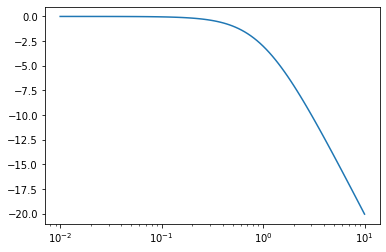

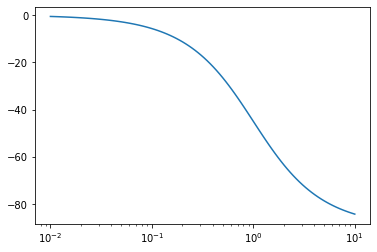

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt

sys = signal.TransferFunction([1], [1, 1])
w, mag, phase = signal.bode(sys)

plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

## Example 2: 

$$ \dot{x} = 
\begin{pmatrix} -1 & -7 \\ 2 & -10
\end{pmatrix}
x(t)
+
\begin{pmatrix} 
1 \\ 0
\end{pmatrix}
u(t)
$$
$$ 
y(t) = 
\begin{pmatrix} 
1 & 0 \\
0 & 1 
\end{pmatrix}
x_i
$$

Simulate this system for a sinusoidal input $u = \sin(\omega t)$.

How does the choice of $w$ affects the result?

num: [[ 0.  1. 10.]
 [ 0.  0.  2.]]
den: [1. 9. 4.]


Text(0.5, 0, 'Frequency [rad/sample]')

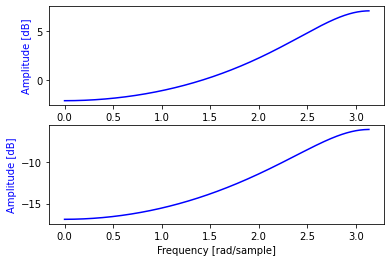

In [ ]:
from scipy.signal import ss2tf
from scipy.signal import freqz


A = np.array([[1, -7], [2, -10]])
B = np.array([[1], [0]])
C = np.eye(2)
D = np.zeros((2, 1))

num, den = ss2tf(A, B, C, D)

print("num:", num)
print("den:", den)

w1, h1 = freqz(num[0, :], den)
w2, h2 = freqz(num[1, :], den)

plt.subplot(211)
plt.plot(w1, 20 * np.log10(abs(h1)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')

plt.subplot(212)
plt.plot(w2, 20 * np.log10(abs(h2)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')

# 4. Discrete systems


Digital control is a branch of control theory that uses digital computers to act as a system. Depending on the requirements, a digital control system can take the form of a microcontroller to an ASIC to a standard desktop computer. Since a digital computer is a discrete system the Laplace transform is replaced with the Z-transform.

A discrete system or discrete-time system, as opposed to a continuous-time system, is one in which the signals are sampled periodically. It is usually used to connote an analog sampled system, rather than a digital sampled system, which uses quantized values.

<p><img alt="mbk" height="300px" src="https://drive.google.com/uc?id=1IiykKJbh85zRs_C-384ukiNToXrvW_Ay" align="center" hspace="350px" vspace="0px"></p>

Where do discrete systems arise?
Typical control engineering example: Assume the DAC+ADC are clocked at sampling period $T$ .

Then $u(t)$ is given by: 

$u(k) ≡ u_c (t); kT ≤ t < (k + 1)T$
$\quad y(k) ≡ y_c (kT ); k = 0, 1, 2, ...$

Suppose: time continuous system is given by state-space 
$$x_c(t) = A x_c(t) + B u_c(t); 
x_c(0) = x_0
y_c(t) = Cx_c(t) + Du_c(t).$$
 
The corresponding discrete sytems is like
\begin{align*}
x(k + 1) &= A_d x(k) + B_d u(k) \\
y(k) &= C_d x(k) + D_d u(k).
\end{align*}


**Discretization**

Consider linear time-invariant autonomous system:

\begin{equation}
    \dot {{x}} = {A} {x}
\end{equation}


The time derivative $\dot {{x}}$ can be replaces with a finite difference:

\begin{equation}
\dot {{x}} \approx \frac{1}{\Delta t}({x}(t + \Delta t) - {x}(t))
\end{equation}

Note that we could have also used other definitions of a finite difference:

\begin{equation}
\dot {{x}} \approx \frac{1}{\Delta t}({x}(t + 0.5\Delta t) - {x}(t - 0.5\Delta t))
\end{equation}

or

\begin{equation}
\dot {{x}} \approx \frac{1}{\Delta t}({x}(t) - {x}(t - \Delta t))
\end{equation}




We can introduce notation:

\begin{equation}
\begin{cases}
{x}_0 = {x}(0) \\
{x}_1 = {x}(\Delta t) \\
{x}_2 = {x}(2\Delta t) \\
... \\
{x}_n = {x}(n\Delta t) 
\end{cases}
\end{equation}

We say that ${x}_i$ is the value of ${x}$ at the time step $i$. Then the finite difference can be written, for example, as follows:

\begin{equation}
\dot {{x}} \approx \frac{1}{\Delta t}({x}_{i+1} - {x}_i)
\end{equation}



We can rewrite our original autonomous LTI as follows:

\begin{equation}
\frac{1}{\Delta t}({x}_{i + 1} - {x}_i) = {A} {x}_i
\end{equation}
Isolating ${x}_{i + 1}$ on the left hand side, we get:
\begin{equation}
{x}_{i + 1} = ({A} \Delta t + {I}) {x}_i
\end{equation}


Or alternatively:

\begin{equation}
\frac{1}{\Delta t}({x}_{i + 1} - {x}_i) = {A} {x}_{i + 1}
\end{equation}
Isolating ${x}_{i + 1}$ on the left hand side, we get:
\begin{equation}
{x}_{i + 1} = ({I} - {A} \Delta t)^{-1} {x}_i 
\end{equation}

Defining \emph{discrete state space matrix} $\bar{{A}}$ and \emph{discrete control matrix} $\bar{{B}}$ as follows:

\begin{equation}
\bar{{A}} = {A} \Delta t + {I}
\end{equation}
\begin{equation}
\bar{{B}} = {B} \Delta t
\end{equation}
We get discrete dynamics:

\begin{equation}
{x}_{i+1} = \bar{{A}} {x}_i + \bar{{B}} \mathbf u_i
\end{equation}

This way of defining discrete dynamics is called **zero order hold (ZOH)**.

**Z transform**

To analyse discrete-time systems: the $Z$ transform (analog to Laplace transform for time-continuous system).
It converts linear ordinary difference equation into algebraic equations: easier to find a solution of the system!

$Z$ transform == generalized discrete-time Fourier transform

Given any sequence $f (k)$ the discrete-time Fourier tranform is 
$$ F(ω̃) =\sum_{-\infty}^{+\infty} f(k)e^{−iωk}$$
 with $\omega = 2\pi f, f = \frac{1}{T}$
The sampling frequency in Hz,  T : difference/time between two samples.

In the same spirit: 
$$ F (z) = Z[f (k)] = \sum_{k=0}^{\infty}f(k)z $$
with z a complex variable

Applying the Z transform on first equation:
\begin{align*}
  z.X(z) − zx(0) &= A_d X(z) + B_d U(z)\\
  (zI − A_d )X(z) &= zx(0) + Bu(z)\\
  X(z) &= (zI − A) −1 zx(0) + (zI − A d ) −1 BU (z)\\
  Y (z) &= CX(z) + DU (z) \\
  &= C(zI − A d ) −1 zx(0) + (C(zI − A d ) −1 B + D)U (z)\\
\end{align*}
  if $x(0) = 0$ then we get the input–output relation:
  $$Y (z) = G(z)U (z)$$ 
  with $G(z) = C(zI − A d ) −1 B + D$

it follows the input–output relation:
\begin{align*}
(z_n + z_{n−1} a_{n−1} + ... + za_1 + a_0 )Y (z) &= (z_m b_m + ... + zb_1 + b_0 )U(z)\\
Y (z) &= \frac{z_m b_m +...+zb_1 +b_0}{z_n +...+za_1 +a_0} U(z)\\
Y (z) &= G(z)U (z)
\end{align*}


**Stability :**

For LODE state space system: 
$$H(z) = \alpha \frac{\pi_{j=1}^m(z-z_i)}{\pi_{j=1}^m(z-p_i)}$$

With partial fraction of the rational function, once again pole locations tell us a lot about the shape of pulse response.

Stability directly from state space: exactly as for cts systems, assuming no and $D=0$ then the caracteristic equation:
$$a(z) = det(zI − A d ).$$

The poles are eigenvalues of $A_d$ . So check stability, use an eigenvalue solver to get eigenvalues of the matrix $A_d$ , then if $|λ_i | < 1$ for all $i$ then the system is stable. Where $|λ_i|$ is the $i th$ e-value of $A_d$ .

For example let's consider the following system
$$ H(z)  = \frac{1}{1 - a z^{-1}} $$
This system has a pole at $z = a$, and a zero at $z = 0$
We know the impulse response of the system above is $h(n) = a^n$
$$ \sum_{n=0}^{\infty} |h_n|  = \sum_{n=0}^{\infty} |a^n| = \sum_{n=0}^{\infty} |a|^n$$
* For this sequence to be stable it must have a finite sum. As it repesents the sum of a geometric progession, the sum
is finite if and only if $|a| < 1$
* That means that the POLE must be within the unit circle!

## Example 1:


Let's consider discrete system: $x_{i+1} = Ax_i + Bu_i$
Find which of the followig systems is stable:

$$x_{i+1} = 
\begin{pmatrix} 0.4 & 0.2 \\ -0.05 & 0.1
\end{pmatrix}
x_i
$$


$$x_{i+1} = 
\begin{pmatrix} 10 & -0.2 \\ 0 & 0.5
\end{pmatrix}
x_i
$$


$$x_{i+1} = 
\begin{pmatrix} -7 & 2 \\ -0.2 & 1
\end{pmatrix}
x_i
+
\begin{pmatrix} 
0 \\ 1.5
\end{pmatrix}
u_i, \ \ \ 
u_i = 
\begin{pmatrix} 
1 & 0.1
\end{pmatrix}
x_i
$$


$$x_{i+1} = 
\begin{pmatrix} -2.1 & -3.3 \\ 0 & 0.2
\end{pmatrix}
x_i
+
\begin{pmatrix} 
-10 \\ 1
\end{pmatrix}
u_i, \ \ \ 
u_i = 2x_i
$$



## Simulation of discrete systems

Consider the system: $x_{i+1} = Ax_i$. Let us pick values for the matrix $A$ and simulate it forward.

eigenvalues of A: [ 0.83898669 -0.73898669]


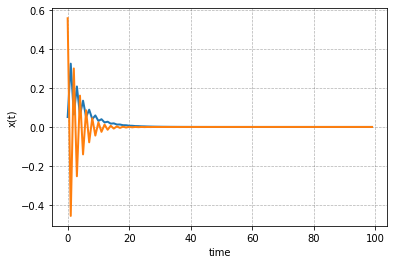

In [ ]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

n=2
A = np.array([[0.9, 0.5], [-0.2, -0.8]])

e, v = eig((A))
print("eigenvalues of A:", e)

Count = 100
time = np.zeros((Count))
dt = 0.01

x0 = np.random.rand(n)  # initial state
solution = np.zeros((Count, 2))
solution[0, :] = x0

for i in range(0, Count-1):
    x = solution[i, :]
    x = A.dot(x)
    solution[i+1, :] = np.reshape(x, (1, 2))
    time[i] = dt*i

plt.plot(range(0, Count), solution, linewidth=2)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.grid(color='k', linestyle='--', linewidth=0.7, alpha=0.3)